In [19]:
import pandas as pd
import numpy as np
import re
import sys
import IPython
from IPython.display import display
import seaborn as sns
sns.set()  # Plot using the seaborn style

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('/content/Life-Expectancy-Data-Updated.csv')

In [3]:
list(df.head())

['Country',
 'Region',
 'Year',
 'Infant_deaths',
 'Under_five_deaths',
 'Adult_mortality',
 'Alcohol_consumption',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'Polio',
 'Diphtheria',
 'Incidents_HIV',
 'GDP_per_capita',
 'Population_mln',
 'Thinness_ten_nineteen_years',
 'Thinness_five_nine_years',
 'Schooling',
 'Economy_status_Developed',
 'Economy_status_Developing',
 'Life_expectancy']

In [4]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [5]:
df.isnull().sum()

,0
Country,0
Region,0
Year,0
Infant_deaths,0
Under_five_deaths,0
Adult_mortality,0
Alcohol_consumption,0
Hepatitis_B,0
Measles,0
BMI,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

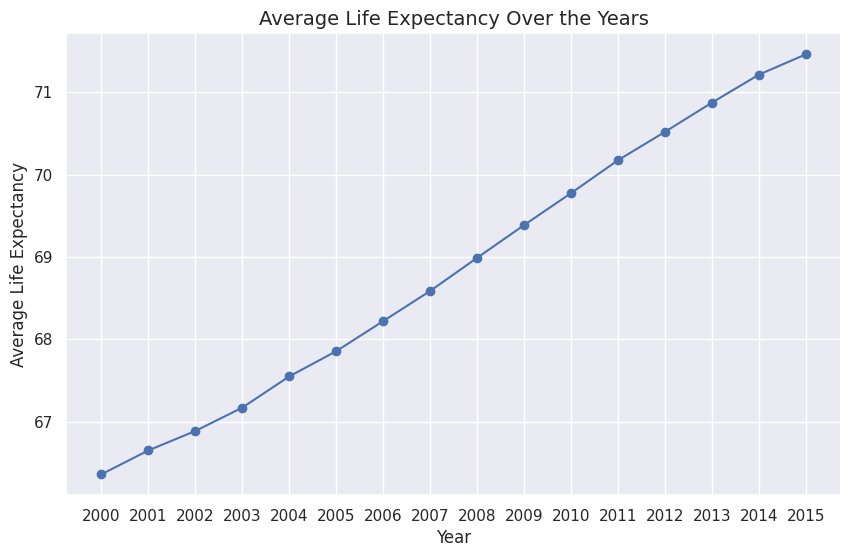

In [7]:

df1=df[['Year','Life_expectancy','Region','Country']]
df1=df.groupby(['Year'])['Life_expectancy'].mean()
# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1.values, marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Average Life Expectancy Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Life Expectancy', fontsize=12)
plt.xticks(np.arange(2000,2016, step=1))

# Show the plot
plt.show()


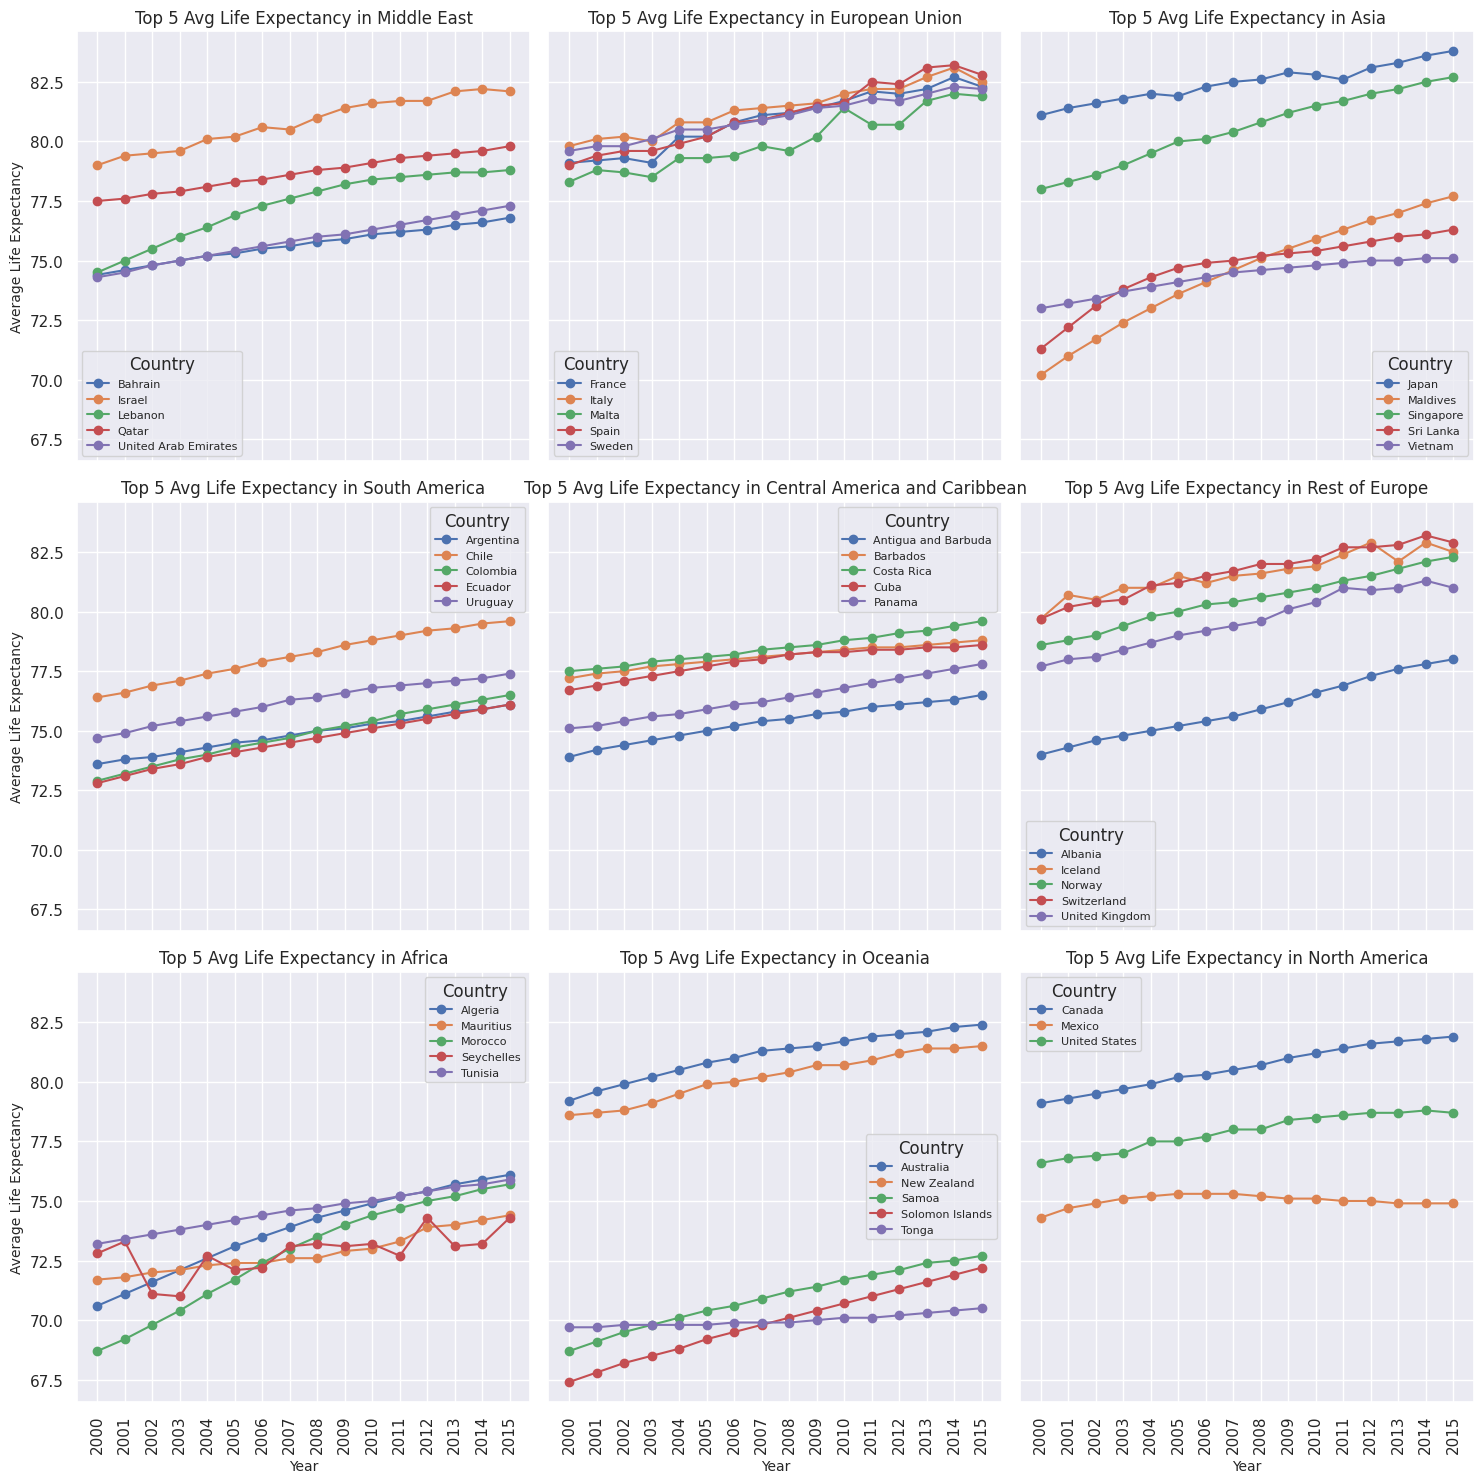

In [8]:
# สร้าง DataFrame แยกตาม Region
df1 = df[['Year', 'Life_expectancy', 'Region', 'Country']]

# ฟังก์ชันหา Top 5 ประเทศที่มีค่าเฉลี่ย Life Expectancy สูงสุดในแต่ละภูมิภาค
def get_top5_countries_by_region(region_data):
    # หาเฉลี่ยของ Life Expectancy ต่อประเทศ
    avg_life_expectancy = region_data.groupby('Country')['Life_expectancy'].mean()
    # เลือก Top 5 ประเทศที่มีค่า Life Expectancy สูงสุด
    top5_countries = avg_life_expectancy.nlargest(5).index
    return region_data[region_data['Country'].isin(top5_countries)]

# กำหนดรายชื่อภูมิภาคที่ไม่ซ้ำกัน
regions = df1['Region'].unique()

# กำหนดขนาดและ layout ของ subplot
n_rows = (len(regions) + 2) // 3  # จำนวนแถวของ subplot
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows), sharex=True, sharey=True)

# Flatten axes สำหรับใช้กับการทำ loop
axes = axes.flatten()

# loop แต่ละภูมิภาคและสร้างกราฟ
for i, region in enumerate(regions):
    ax = axes[i]

    # เลือกข้อมูลเฉพาะของภูมิภาคนี้
    region_data = df1[df1['Region'] == region]

    # เลือกเฉพาะ Top 5 ประเทศที่มีค่า Life Expectancy เฉลี่ยสูงสุดในภูมิภาคนี้
    top5_data = get_top5_countries_by_region(region_data)

    # หาเฉลี่ย Life Expectancy ของ Top 5 ประเทศในแต่ละปี
    top5_avg = top5_data.groupby(['Year', 'Country'])['Life_expectancy'].mean().unstack()

    # Plot line graph สำหรับค่าเฉลี่ย Life Expectancy ของ Top 5 ประเทศในภูมิภาคนี้
    top5_avg.plot(ax=ax, marker='o', linestyle='-')

    # ตั้งค่า title และ legend
    ax.set_title(f'Top 5 Avg Life Expectancy in {region}', fontsize=12)
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Average Life Expectancy', fontsize=10)
    ax.legend(title='Country', fontsize=8)

    # ตั้งค่าช่วงของค่าบนแกน X และหมุนข้อความแกน X ให้เป็นแนวตั้ง
    ax.set_xticks(np.arange(2000, 2016, step=1))
    ax.tick_params(axis='x', rotation=90)

# ตั้งค่าให้ไม่แสดง subplot ที่ว่าง (ถ้ามี)
for i in range(len(regions), len(axes)):
    fig.delaxes(axes[i])

# กำหนด layout และแสดงผลกราฟ
plt.tight_layout()
plt.show()

In [9]:
# สร้าง DataFrame จากค่าเฉลี่ยของ life expectancy ตามประเทศ
df1 = df.groupby(['Country'])['Life_expectancy'].mean().reset_index()

# เปลี่ยนชื่อคอลัมน์ 'Life_expectancy' เป็น 'Avg_Life_Expectancy'
df1 = df1.rename(columns={'Life_expectancy': 'Avg_Life_Expectancy'})

# ใช้ Plotly ในการสร้าง choropleth map
fig = px.choropleth(
    df1,
    locations="Country",  # ชื่อ column ประเทศ
    locationmode="country names",  # ใช้ชื่อประเทศในการระบุที่ตั้ง
    color="Avg_Life_Expectancy",  # ค่า life expectancy ที่จะแสดงในแผนที่
    hover_name="Country",  # แสดงชื่อประเทศเมื่อ hover
    color_continuous_scale=px.colors.sequential.Plasma,  # สเกลสีของค่า
    title="Average Life Expectancy by Country"
)

# ปรับแต่ง layout
fig.update_layout(
    title_x=0.5,  # จัดหัวข้อให้อยู่ตรงกลาง
    coloraxis_colorbar=dict(
        x=1,  # ขยับ legend มาชิดแผนที่
        title="Avg Life Expectancy",  # เปลี่ยนชื่อ legend (ถ้าต้องการ)
        ticks="outside"
    ),
    width=1600,  # ปรับความกว้างของแผนที่
    height=800  # ปรับความสูงของแผนที่
)

# แสดงแผนที่
fig.show()

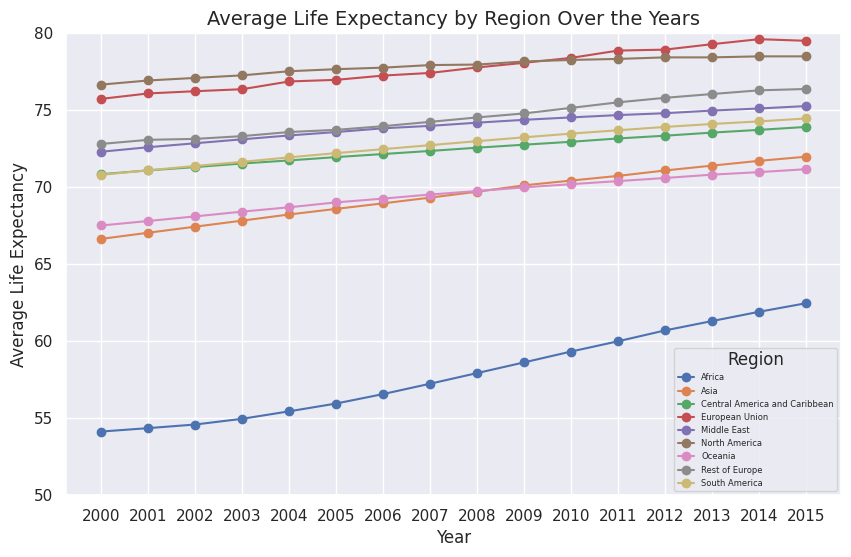

In [10]:
df2=df.groupby(['Year','Region'])['Life_expectancy'].mean()

plt.figure(figsize=(10, 6))

# Unstack the multi-index to get regions as columns
df2_unstacked = df2.unstack(level='Region')

# Plot a line for each region
for region in df2_unstacked.columns:
    plt.plot(df2_unstacked.index, df2_unstacked[region], marker='o', linestyle='-', label=region)

# Add titles and labels
plt.title('Average Life Expectancy by Region Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Life Expectancy', fontsize=12)
plt.ylim(50,80)
# Add a legend to differentiate the regions
plt.legend(title='Region', fontsize = 6, loc='lower right')
plt.xticks(np.arange(2000,2016, step=1))

# Show the plot
plt.grid(True)
plt.show()

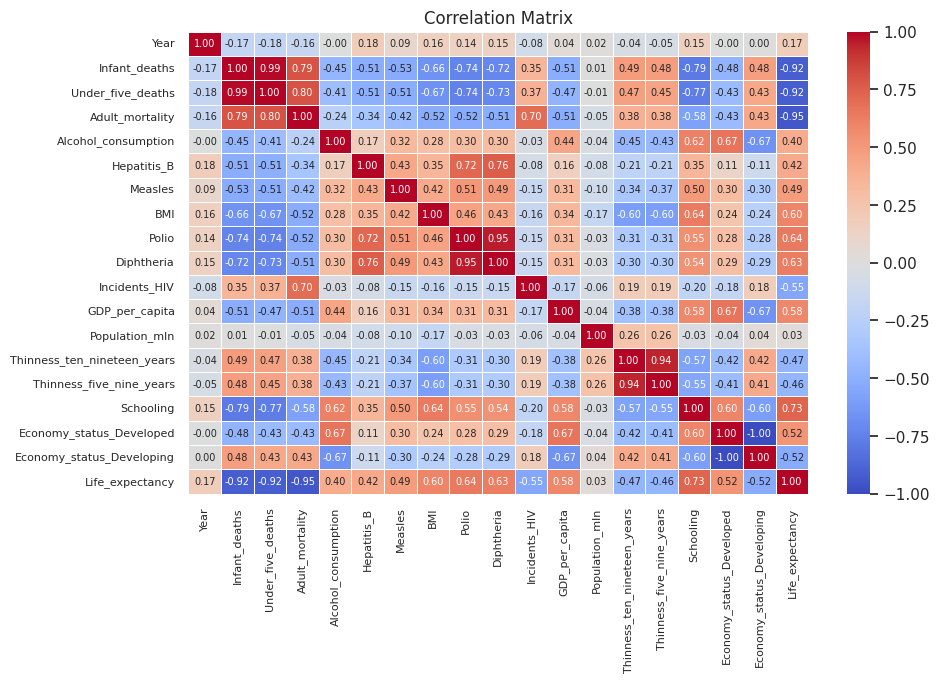

In [11]:
data_numeric = df.drop(['Country', 'Region'], axis=1)

# Creating the correlation matrix
correlation_matrix = data_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 7})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Correlation Matrix')
plt.show()

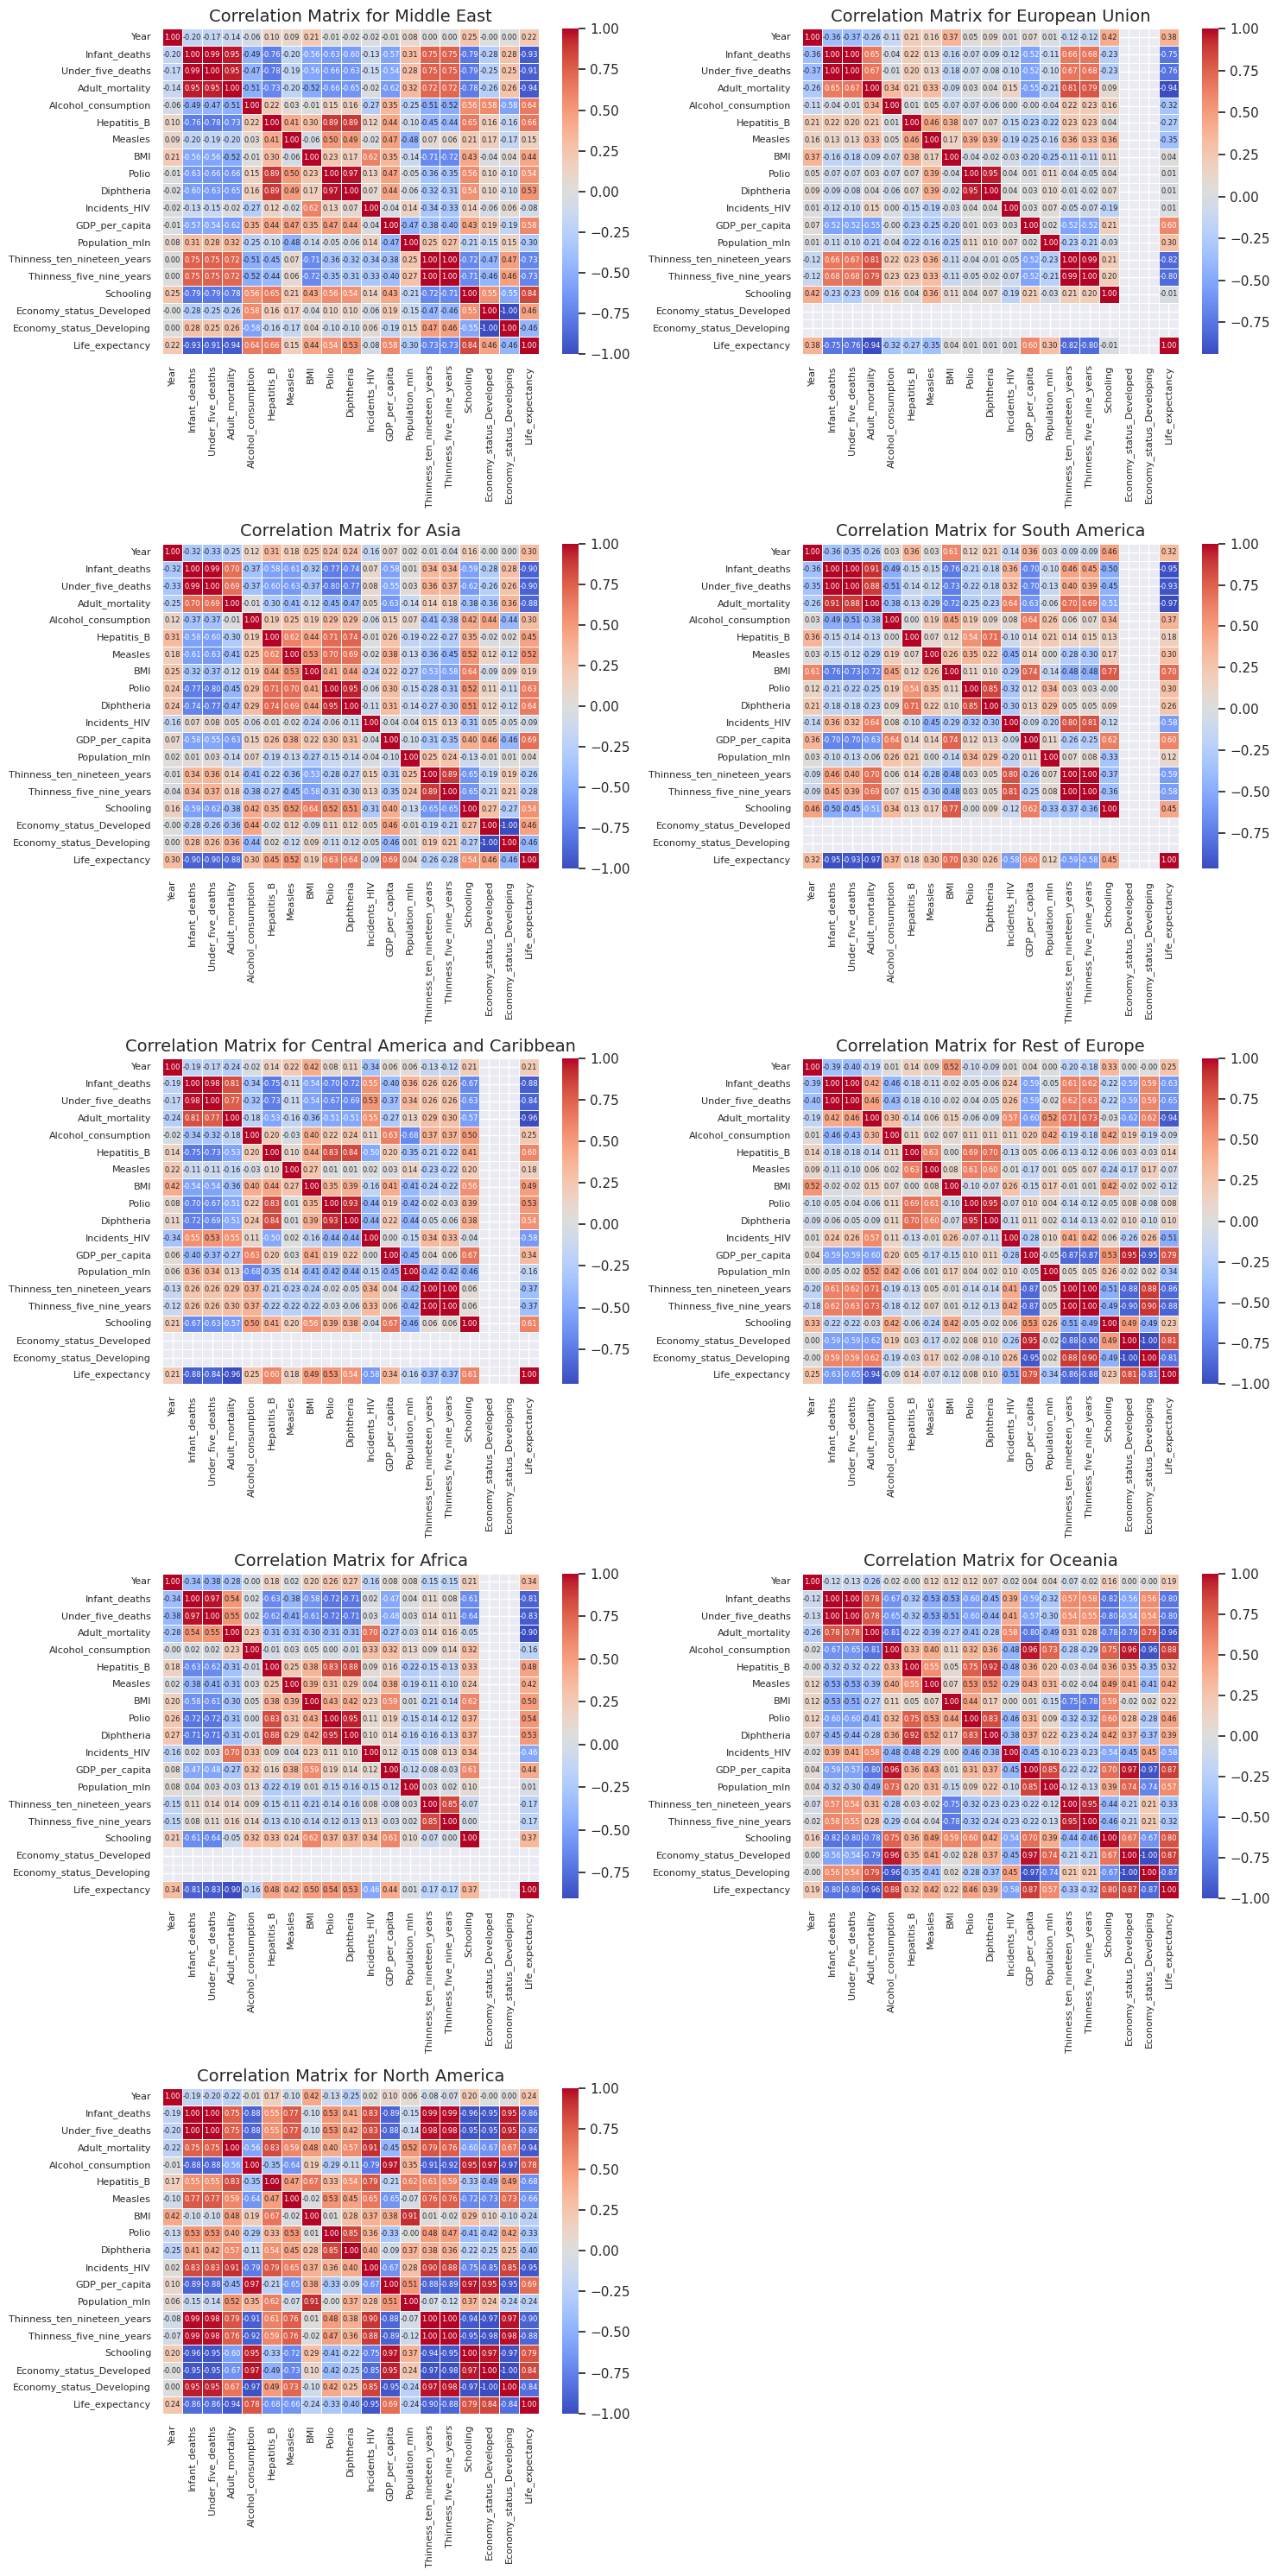

In [12]:
# Assuming df has the 'Region' column for grouping
regions = df['Region'].unique()
n_regions = len(regions)

# Define the number of rows and columns for subplots (2 regions per row)
n_cols = 2
n_rows = (n_regions + 1) // n_cols  # Calculate the number of rows needed

# Create a figure with subplots, two per row
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 6))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, region in enumerate(regions):
    # Filter data for the current region
    data_region = df[df['Region'] == region].drop(['Country', 'Region'], axis=1)

    # Create the correlation matrix for the current region
    correlation_matrix = data_region.corr()

    # Plot heatmap for the current region
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
                annot_kws={"size": 6}, ax=axes[i])

    # Set the title for each subplot
    axes[i].set_title(f'Correlation Matrix for {region}', fontsize=14)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# Remove empty subplots if the number of regions is odd
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Preparing the data: dropping non-numeric columns and separating target variable
X = df.drop(columns=['Country', 'Region', 'Life_expectancy'])  # Features
y = df['Life_expectancy']  # Target variable

# Adding a constant for the regression model
X_with_const = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X_with_const).fit()

# Displaying the summary to interpret which variables are significant
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     7925.
Date:                Wed, 09 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:03:53   Log-Likelihood:                -4928.7
No. Observations:                2864   AIC:                             9893.
Df Residuals:                    2846   BIC:                         1.000e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          23.8667      7.606      3.138      0.002       8.954      38.780
Year                            0.0245      0.006      4.305      0.000       0.013       0.036
Infant_deaths                  -0.0474      0.006     -7.689      0.000      -0.059      -0.035
Under_five_deaths              -0.0563      0.004    -14.711      0.000      -0.064      -0.049
Adult_mortality                -0.0482      0.001    -77.878      0.000      -0.049      -0.047
Alcohol_consumption             0.0662      0.010      6.688      0.000       0.047       0.086
Hepatitis_B                    -0.0088      0.003     -3.435      0.001      -0.014      -0.004
Measles                         0.0016      0.002      0.933      0.351      -0.002       0.005
BMI                            -0.1494      0.019     -7.818      0.000      -0.187      -0.112
Polio                           0.0030      0.006      0.513      0.608      -0.008       0.014
Diphtheria                      0.0007      0.006      0.125      0.901      -0.011       0.012
Incidents_HIV                   0.0949      0.018      5.232      0.000       0.059       0.130
GDP_per_capita               2.576e-05   2.28e-06     11.282      0.000    2.13e-05    3.02e-05
Population_mln                 -0.0001      0.000     -0.724      0.469      -0.001       0.000
Thinness_ten_nineteen_years    -0.0358      0.017     -2.093      0.036      -0.069      -0.002
Thinness_five_nine_years        0.0028      0.017      0.169      0.866      -0.030       0.036
Schooling                       0.0884      0.017      5.250      0.000       0.055       0.121
Economy_status_Developed       12.2644      3.801      3.227      0.001       4.812      19.717
Economy_status_Developing      11.6023      3.805      3.049      0.002       4.141      19.064
==============================================================================
Omnibus:                       15.194   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.110
Skew:                           0.121   Prob(JB):                     0.000193
Kurtosis:                       3.291   Cond. No.                     7.93e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.92e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
X1 = df.drop(columns=['Year','Country', 'Region', 'Life_expectancy','Economy_status_Developed','Economy_status_Developing'])  # Features
y1 = df['Life_expectancy']  # Target variable

# Adding a constant for the regression model
X_with_const1 = sm.add_constant(X1)

# Fitting the model
model = sm.OLS(y1, X_with_const1).fit()

# Displaying the summary to interpret which variables are significant
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     8817.
Date:                Wed, 09 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:27:34   Log-Likelihood:                -4955.8
No. Observations:                2864   AIC:                             9944.
Df Residuals:                    2848   BIC:                         1.004e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          85.0703      0.611    139.141      0.000      83.871      86.269
Infant_deaths                  -0.0515      0.006     -8.328      0.000      -0.064      -0.039
Under_five_deaths              -0.0530      0.004    -13.830      0.000      -0.060      -0.045
Adult_mortality                -0.0489      0.001    -79.604      0.000      -0.050      -0.048
Alcohol_consumption             0.0902      0.009     10.081      0.000       0.073       0.108
Hepatitis_B                    -0.0093      0.003     -3.618      0.000      -0.014      -0.004
Measles                         0.0012      0.002      0.711      0.477      -0.002       0.005
BMI                            -0.1674      0.019     -8.854      0.000      -0.204      -0.130
Polio                           0.0009      0.006      0.148      0.882      -0.011       0.012
Diphtheria                      0.0033      0.006      0.550      0.583      -0.008       0.015
Incidents_HIV                   0.1005      0.018      5.502      0.000       0.065       0.136
GDP_per_capita               3.043e-05   2.15e-06     14.181      0.000    2.62e-05    3.46e-05
Population_mln                 -0.0002      0.000     -0.902      0.367      -0.001       0.000
Thinness_ten_nineteen_years    -0.0331      0.017     -1.921      0.055      -0.067       0.001
Thinness_five_nine_years       -0.0024      0.017     -0.145      0.885      -0.036       0.031
Schooling                       0.1119      0.017      6.709      0.000       0.079       0.145
==============================================================================
Omnibus:                       10.730   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.448
Skew:                           0.110   Prob(JB):                      0.00327
Kurtosis:                       3.219   Cond. No.                     4.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared: 0.979 meaning that 97.9% of the variability in life expectancy can be explained by the predictive variables included in the model.

Key influential variables (based on p-values and coefficients):

no significant (p-value >0.05) :
*   Measles
*   Polio
*   Diphtheria
*   Population_mln
*   Thinness_ten_nineteen_years
*   Thinness_five_nine_years

significant :


1.   Negative

Adult mortality

Infant deaths and under-five deaths

BMI

2.   Positive:

Alcohol consumption

HIV incidents

Schooling

GDP per capita

In [22]:
# Group the dataset by region and calculate the mean of relevant columns
regional_summary = df.groupby('Region')[['Infant_deaths', 'Adult_mortality', 'Life_expectancy']].mean().reset_index()

# Display the summary table
print(regional_summary)


                          Region  Infant_deaths  Adult_mortality  \
0                         Africa      60.604044       319.073434   
1                           Asia      32.536111       171.166565   
2  Central America and Caribbean      20.965461       163.581169   
3                 European Union       4.872222       104.395392   
4                    Middle East      16.639286       111.158891   
5                  North America       9.925000       100.693844   
6                        Oceania      26.305114       162.886801   
7                 Rest of Europe       9.627917       138.582856   
8                  South America      19.953646       155.275326   

   Life_expectancy  
0        57.847304  
1        69.454861  
2        72.437500  
3        77.715046  
4        73.975446  
5        77.841667  
6        69.517614  
7        74.525417  
8        72.780729  


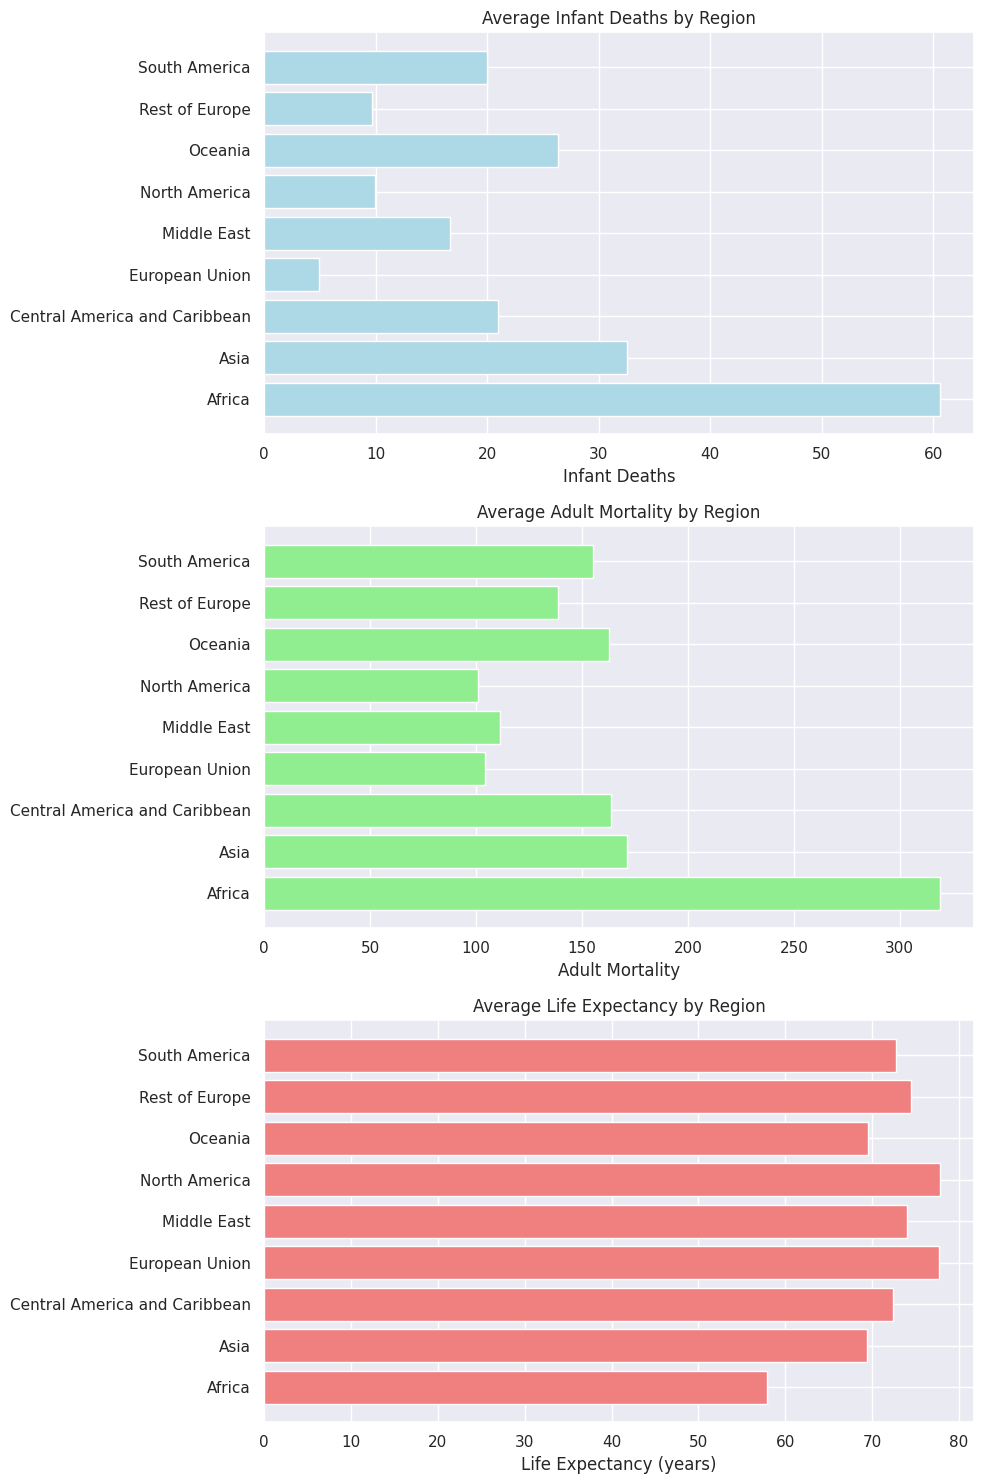

In [23]:
# Set up the figure for subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Plotting Infant Deaths by Region
ax[0].barh(regional_summary['Region'], regional_summary['Infant_deaths'], color='lightblue')
ax[0].set_title('Average Infant Deaths by Region')
ax[0].set_xlabel('Infant Deaths')

# Plotting Adult Mortality by Region
ax[1].barh(regional_summary['Region'], regional_summary['Adult_mortality'], color='lightgreen')
ax[1].set_title('Average Adult Mortality by Region')
ax[1].set_xlabel('Adult Mortality')

# Plotting Life Expectancy by Region
ax[2].barh(regional_summary['Region'], regional_summary['Life_expectancy'], color='lightcoral')
ax[2].set_title('Average Life Expectancy by Region')
ax[2].set_xlabel('Life Expectancy (years)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


This data shows that regions with high infant and adult mortality rates, such as Africa, have significantly lower life expectancy.

Conversely, regions with low mortality rates, such as the European Union and North America, enjoy higher life expectancy